In [1]:
#乖離率reference https://www.cmoney.tw/learn/course/technicals/topic/491
#乖離率，技術概念漲多了會跌，跌多了會漲
#如果是 5 日乖離率，就要用 股價來和 5 日均線 來比較；

In [2]:

#以台積電為例提取資料
import sqlalchemy
from sqlalchemy import create_engine
def get_data_sql(sql_cmd):
   
    engine = create_engine("mysql+pymysql://{}:{}@{}/{}?charset={}".format('root', 'mysql', '127.0.0.1:3306', 'test','utf8'))
    # sql 命令
    sql = sql_cmd      
    df = pd.read_sql(sql=sql_cmd, con=engine)    
    return df

In [3]:
import pandas as pd
df = get_data_sql("SELECT * FROM stock_price WHERE StockID = 2412" )
df = df.set_index(['Date'])
df.head(5)

,StockID,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-11-15,2412,96.175301,96.175301,90.772202,91.852898,35.009571,8.635625e+09
2000-11-16,2412,90.772202,94.014099,89.691597,92.393204,35.215508,1.107208e+10
2000-11-17,2412,90.772202,95.635002,90.232002,95.635002,36.451107,9.967972e+09
2000-11-20,2412,96.175301,96.715698,93.473801,94.554398,36.039238,8.434032e+09
2000-11-21,2412,94.554398,101.038002,94.554398,101.038002,38.510452,1.190772e+07


In [4]:
#檢查空值
print(df.isna().sum())
df = df.dropna()

StockID       0
Open         58
High         58
Low          58
Close        58
Adj Close    58
Volume       58
dtype: int64


In [5]:
def bias(move_days):
    bias=100*(df['Close']-df['Close'].rolling(move_days).mean())/df['Close'].rolling(move_days).mean()
    return bias

In [6]:
#乖離率=(現在價格-移動平均價/移動平均價)
df['bias5']=bias(5)
df['bias60']=bias(60)
df.fillna(1, inplace=True)
df.tail(20)


,StockID,Open,High,Low,Close,Adj Close,Volume,bias5,bias60
Date,,,,,,,,,
2019-04-29,2412,110.5,111.0,110.0,111.0,111.0,4857669.0,3.616637e-01,2.706454
2019-04-30,2412,111.0,111.5,110.5,111.0,111.0,10475394.0,2.710027e-01,2.635229
2019-05-02,2412,111.0,111.5,111.0,111.0,111.0,6188875.0,1.805054e-01,2.579900
2019-05-03,2412,111.0,111.5,110.5,111.0,111.0,5941965.0,9.017133e-02,2.516740
2019-05-06,2412,111.0,111.0,110.0,110.5,110.5,6726957.0,-3.606853e-01,2.000000
2019-05-07,2412,110.5,111.0,110.5,110.5,110.5,3540974.0,-2.707581e-01,1.945106
2019-05-08,2412,110.5,111.5,110.5,111.5,111.5,7319926.0,5.410280e-01,2.788661
2019-05-09,2412,111.0,111.0,110.0,110.0,110.0,7887213.0,-6.323397e-01,1.359134
2019-05-10,2412,110.0,110.5,109.5,110.0,110.0,6963743.0,-4.524887e-01,1.312457


In [7]:
import numpy as np
#用兩個標準差找來試試看
print(np.mean(df['bias60'].tolist())+2*np.std(df['bias60'].tolist(), ddof=1))
print(np.mean(df['bias60'].tolist())-2*np.std(df['bias60'].tolist(), ddof=1))

9.60655049080705
-9.183439822800123


In [8]:
#signal自行嘗試
signal = ((bias(60) < 9.6) & (bias(60) > -9.18))

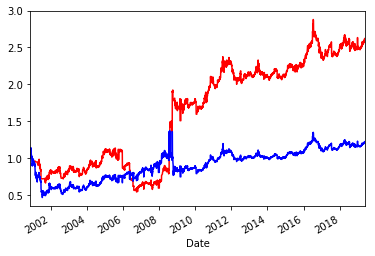

In [9]:
from pandas_datareader import data 
import matplotlib.pyplot as plt    
import pandas as pd                
%matplotlib inline
c=df['Close']
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')

In [ ]:
#問題:個股特性不一(乖離區間大小)
#必須調整參數:ma天數、正負乖離率
#以歷史數據來看5ma條件下正乖離率<12，負乖離率>-1，還不錯
#發現:大部分持續上升或下降股票長期使用乖離率投資不會比較好，乖離率較適用於穩定的定存股ex:中華電信
